In [6]:
# first time, create a symbolic link: !ln -s ./lib/graphics.py graphics.py here

#from graphics.py import *
from graphics import *

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time

sns.set()

In [7]:
def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    y = np.sin((2 * np.pi) * frequencies)
    return x, y


In [8]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

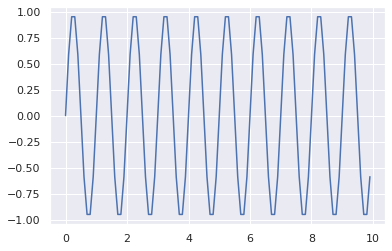

In [9]:
x,y = generate_sine_wave(1,10,10)

plt.plot(x,y)

In [ ]:
import signal
import sys


def main():
        
    color_seq = ['red','orange','yellow','magenta','blue']
    
    origo_x = winsize_x//3
    origo_y = winsize_y * 3 / 2 / 2
    circle_radius = 100
    
    c = Circle(Point(origo_x,origo_y), circle_radius)
    c.setOutline('red')
    c.setWidth(3)
    c.draw(win)
    
    samples = 300
    freq1 = 5
    freq2 = 9 
    freq3 = 5 
    freq4 = 9
    
    radi_fractions = [2,3,4]
    
    print ('freq1:',freq1,'freq2:',freq2,'freq3:',freq3,'freq4:',freq4)
    
    angle = np.linspace(0, freq1 * 2 * np.pi,samples,endpoint=False)
    angle2 = np.linspace(0,freq2 * 2 * np.pi,samples,endpoint=False)
    angle3 = np.linspace(0,freq3 * 2 * np.pi,samples,endpoint=False)
    angle4 = np.linspace(0,freq4 * 2 * np.pi,samples,endpoint=False)
    
    delay = 0.02
    txt_size = 10
    
    x_pos = 0
    sin_point_list = []
    dot1_sin_point_list = []
    dot11_sin_point_list = []
    comb_sin_point_list = []
    
    dot4_list = []

    txt_point = Point(400,20)
    
    txt = Text(
        txt_point,'Cycle (red) : {} Hz, Epicycle1 (magenta) : {} Hz, Epicycle2 (blue) : {} Hz, Epicycle3 (yellow) {} Hz'.format(
                freq1,freq2,freq3,freq4))
    
    txt.setSize(txt_size)
    txt.draw(win2)
    
    
    while True:

        for i,a in enumerate(angle):
            x1,y1 = origo_x + circle_radius * np.cos(a),origo_y - circle_radius * np.sin(a)
            
            radius = Line(Point(origo_x,origo_y),Point(x1,y1))
            radius.setWidth(2)

            dot = Circle(Point(x1,y1),7)
            dot.setFill('red')
            radius.setFill('red')
            
            dot.draw(win)
            radius.draw(win)
            
            ### C2
            c2 = Circle(Point(x1,y1),circle_radius // radi_fractions[0] )
            c2.setOutline('magenta')
            c2.setWidth(3)
            c2.draw(win)
                
            x2,y2 = x1 + (circle_radius // radi_fractions[0]) * np.cos(angle2[i%(samples)]) ,\
            y1 - (circle_radius // radi_fractions[0]) * np.sin(angle2[i%(samples)])
            
            radius2 = Line(Point(x1,y1),Point(x2,y2))
            radius2.setWidth(2)
            radius2.setFill('magenta')
            
            dot2 = Circle(Point(x2,y2),7)
            
            dot2.setFill('magenta')
            dot2.draw(win)
            radius2.draw(win)
            
            ### C3
            c3 = Circle(Point(x2,y2),circle_radius // radi_fractions[1])
            c3.setOutline('blue')
            c3.setWidth(3)
            c3.draw(win)
            
            x3,y3 = x2 + (circle_radius // radi_fractions[1]) * np.cos(angle3[i % samples]),\
            y2 - (circle_radius // radi_fractions[1]) * np.sin(angle3[i%samples])
            
            radius3 = Line(Point(x2,y2),Point(x3,y3))
            radius3.setWidth(2)
            radius3.setFill('blue')
            
            dot3 = Circle(Point(x3,y3),7)
            dot3.setFill('blue')
            dot3.draw(win)
            radius3.draw(win)
            
            #C4
            
            c4 = Circle(Point(x3,y3),circle_radius // radi_fractions[2])
            c4.setOutline('yellow')
            c4.setWidth(3)
            c4.draw(win)
            
            x4,y4 = x3 + (circle_radius // radi_fractions[2]) * np.cos(angle4[i % samples]),\
            y3 - (circle_radius // radi_fractions[2]) * np.sin(angle4[i%samples])
            
            radius4 = Line(Point(x3,y3),Point(x4,y4))
            radius4.setWidth(2)
            radius4.setFill('yellow')
            
            dot4 = Circle(Point(x4,y4),7)
            dot4.setFill('yellow')
            dot4_list.append(dot4)
            dot4.draw(win)
            radius4.draw(win)
            
            
            #########################
            
            time.sleep(delay)
            
            # c is only circle that stays in place,no need to undraw
            dot.undraw() 
            radius.undraw()
            
            c2.undraw()
            dot2.undraw()
            radius2.undraw()
            
            dot3.undraw()
            c3.undraw()
            radius3.undraw()
            
            
            #dot4.undraw()
            dot4.setFill(color_seq[i%len(color_seq)])
            
            c4.undraw()
            radius4.undraw()
            
            
            #### plot of sine for freq1 ###
            sin_p = Point(x_pos,winsize_y // 2 - circle_radius * np.sin(a))
            sin_p.setFill('red')
            sin_point_list.append(sin_p)
            
            sin_p.draw(win2)
            
            if x_pos == winsize_x - 1:
                for d4 in dot4_list:
                    d4.undraw()
                
                txt.undraw()

                for pt in sin_point_list:
                    pt.undraw()
                    
                del (sin_point_list)
                sin_point_list = []
                
                frequencies = list(range(1,10))
                
                sel_freq = np.random.choice(frequencies,replace=False,size=4)
                freq1 = sel_freq[0]
                freq2 = sel_freq[1]
                freq3 = sel_freq[2]
                freq4 = sel_freq[3]
                
                print ('freq1:',freq1,'freq2:',freq2,'freq3',freq3,'freq4:',freq4)
            
                angle = np.linspace(0, freq1 * 2 * np.pi,samples,endpoint=False)
                angle2 = np.linspace(0,freq2 * 2 * np.pi,samples,endpoint=False)
                angle3 = np.linspace(0,freq3 * 2 * np.pi,samples,endpoint=False)
                angle4 = np.linspace(0,freq4 * 2 * np.pi,samples,endpoint=False)
                
                txt = Text(
                    txt_point,'Cycle (red) : {} Hz, Epicycle1 (magenta) : {} Hz, Epicycle2 (blue) : {} Hz, Epicycle3 (yellow) {} Hz'.format(
                        freq1,freq2,freq3,freq4))
                
                txt.setSize(txt_size)
                txt.draw(win2)
            
       
            ################################
            
            
            #### plot of sine for first epi freq's ####
            dot1_sin = Point(
                x_pos,winsize_y // 2 - (
                    circle_radius * np.sin(a) +\
                    circle_radius // radi_fractions[0] * np.sin(angle2[i%samples])))
            
            dot1_sin.setFill('magenta')
            dot1_sin_point_list.append(dot1_sin)
            
            dot1_sin.draw(win2)
            
            if x_pos == winsize_x - 1:
                for pt in dot1_sin_point_list:
                    pt.undraw()
                    
                del (dot1_sin_point_list)
                dot1_sin_point_list = []
                                
                
            ################################
             #### plot of sine for second epi freq's ####
            dot11_sin = Point(
                x_pos,winsize_y // 2 - (
                    circle_radius * np.sin(a) +\
                    circle_radius // radi_fractions[0] * np.sin(angle2[i%samples])+\
                circle_radius // radi_fractions[2] * np.sin(angle3[i%samples])))
            
            dot11_sin.setFill('blue')
            dot11_sin_point_list.append(dot11_sin)
            
            dot11_sin.draw(win2)
            
            if x_pos == winsize_x - 1:
                for pt in dot11_sin_point_list:
                    pt.undraw()
                    
                del (dot11_sin_point_list)
                dot11_sin_point_list = []
            ################################
            
            
            #### plot of sine for combined freq's ####
            dot2_sin = Point(
                x_pos,winsize_y // 2 - (
                    circle_radius * np.sin(a) +\
                    circle_radius // radi_fractions[0] * np.sin(angle2[i%samples]) +\
                    circle_radius // radi_fractions[1] * np.sin(angle3[i%samples]) +\
                circle_radius // radi_fractions[2] * np.sin(angle4[i%samples])))
            
            dot2_sin.setFill('yellow')
            comb_sin_point_list.append(dot2_sin)
            
            dot2_sin.draw(win2)
            
            if x_pos == winsize_x - 1:
                for pt in comb_sin_point_list:
                    pt.undraw()
                    
                del (comb_sin_point_list)
                comb_sin_point_list = []
                                
                
            ##########################################
            
            x_pos = (x_pos + 1) % winsize_x
  
    
    win.getMouse() # Pause to view result
    win.close()    # Close window when done

    
def signal_handler(sig, frame):

    print('You pressed Ctrl+C!')
    win.close()
    win2.close()
    sys.exit()
    

winsize_x = 900
winsize_y = 400

win = GraphWin("Circles & Epicircles", winsize_x * 2 / 3, winsize_y * 3 / 2)
win.setBackground('black')
win2 = GraphWin('Sinus',winsize_x ,winsize_y)

signal.signal(signal.SIGINT, signal_handler)


main()


freq1: 5 freq2: 9 freq3: 5 freq4: 9
